In [3]:
## Include packages

using DelimitedFiles
using DCAUtils
using Statistics
using KitMSA
using FastaIO
using LinearAlgebra
using StatsBase
using PyPlot
using Random

include("../src/read_write.jl")
include("../src/energy.jl")
include("../src/msa_tools.jl")
include("../src/extra_tools.jl")
include("../src/mutability.jl")
;

In [265]:
#PATH_PAR_dbd = "../../scra_data_beta/Parameters_conv_decDBD0.98.dat"
PATH_PAR_dbd = "../../scra_data_beta/Parameters_conv_actDBD0.98.dat"
htmp, Jtmp = KitMSA.read_par_BM(PATH_PAR_dbd)
h = KitMSA.set_max_field_to_0(htmp)
J = KitMSA.symmetrize_J(Jtmp)
maximum(J)
;

In [287]:
f1, f2, _ = DCAUtils.compute_weighted_frequencies(Int8.(nat_dbd'), 22, 0.2);
f1 = reshape(f1, (21,76))
f2 = reshape(f2, (21,76,21,76));
conn_corr = zeros(size(f2))
for i in 1:76
    for j in i+1:76
        for a in 1:21
            for b in 1:21
                conn_corr[a,i,b,j] = f2[a,i,b,j] - (f1[a,i]*f1[b,j])
            end
        end
    end
end

θ = 0.2 threshold = 15.0
M = 24944 N = 76 Meff = 3129.1468140631705


In [302]:
cor(abs.(ttcond[19, 15, :, :]'[:]) , abs.(J[15,:,19,:][:]))


0.5179561456357236

In [326]:
ord_J = sortperm([maximum(abs.(J[15,:,19,i])) for i in 1:76], rev = true)
ord_cond = sortperm([maximum(abs.(ttcond[19,15,i,:])) for i in 1:76], rev = true);

In [332]:
epist_score[sortperm(epist_score)]

76-element Vector{Float64}:
 0.007394849008938387
 0.010561579002934196
 0.011838716590625298
 0.0123620837914864
 0.013177695542263945
 0.015620010119173577
 0.015932449787719405
 0.02038798551064068
 0.02345751291911824
 0.023600106290012537
 0.028769729380137
 0.03565737192136742
 0.046705656682383356
 ⋮
 0.7058839340366894
 0.7094420618953725
 0.7367061843567453
 0.7592412746473465
 0.7927402171874267
 0.8884849003633262
 0.9132445727589174
 0.9336289581414294
 0.9987988642380858
 1.0137221815351323
 1.0585620880854414
 1.062498528316669

In [334]:
epist_score[ord_cond[end-20:end]]

21-element Vector{Float64}:
 0.12923969088297182
 0.015932449787719405
 0.20071165294568485
 0.4915081089827811
 0.011838716590625298
 0.05396215942728044
 0.007394849008938387
 0.09062211177058366
 0.40679022693146605
 0.05619647410199402
 0.015620010119173577
 0.21244426207351952
 0.010561579002934196
 0.02345751291911824
 0.046705656682383356
 0.47048558051245504
 0.0123620837914864
 0.023600106290012537
 0.02038798551064068
 0.03565737192136742
 1.0585620880854414

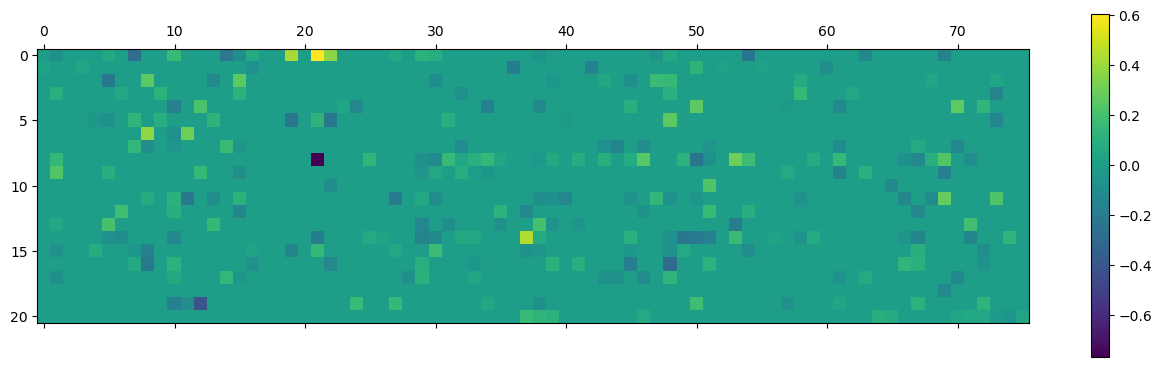

1

In [223]:
matshow(J[15,:,19,:])
colorbar()
argmax(abs.(J[15,:,19,20]))

In [266]:
path_dbd = "../data/alignments/natural/DBD_alignment.uniref90.cov80.a2m"
nat_dbd = Int8.(fasta2matrix(path_dbd))
w_dbd = DCAUtils.compute_weights(Int8.(nat_dbd'), 0.2)[1]
L = size(nat_dbd, 2)
@time freqs_nat_gap = reshape(compute_weighted_frequencies(Int8.(nat_dbd'), 22, 0.2)[1], (21, L))
entr_nat = CIE(nat_dbd)
wt_thornton = Int8.(readdlm("../data/alignments/refs/wt_thornton")[:]);
@time cde_wt = cont_dep_entr_without_deg(wt_thornton, h, J, q = 21) ;
epist_ord = sortperm(abs.(entr_nat .- m_cde_nat), rev = true);
epist_score = abs.(entr_nat .- m_cde_nat);

θ = 0.2 threshold = 15.0
M = 24944 N = 76 Meff = 3129.1468140631705
θ = 0.2 threshold = 15.0
M = 24944 N = 76 Meff = 3129.1468140631705
  4.276248 seconds (28.19 k allocations: 55.673 MiB)
θ = 0.2 threshold = 15.0
M = 24944 N = 76 Meff = 3129.1468140631705
  0.007599 seconds (237 allocations: 52.781 KiB)


In [267]:
cde_nat = zeros(size(nat_dbd))
for s in 1:size(cde_nat,1)
    cde_nat[s,:] = cont_dep_entr_without_deg(nat_dbd[s,:], h, J, q = 21) 
end

m_cde_nat = mean(cde_nat, weights(w_dbd), dims = 1)[:];
var_cde_nat = [var(cde_nat[:,i], weights(w_dbd)) for i in 1:76];

In [268]:
FN = Array{Float64}(undef,L,L)
for i in 1:L
    for j in 1:L
        FN[i,j] = norm(J[:,:,i,j], 2)
    end
end

In [269]:
ttcond = TTcond(19, freqs_nat_gap, 4, nat_dbd, cde_nat, h, J, w_dbd); 

In [270]:
@time tt = TT(nat_dbd, cde_nat, h, J, w_dbd);

  9.792778 seconds (13.27 M allocations: 1.414 GiB, 1.75% gc time)


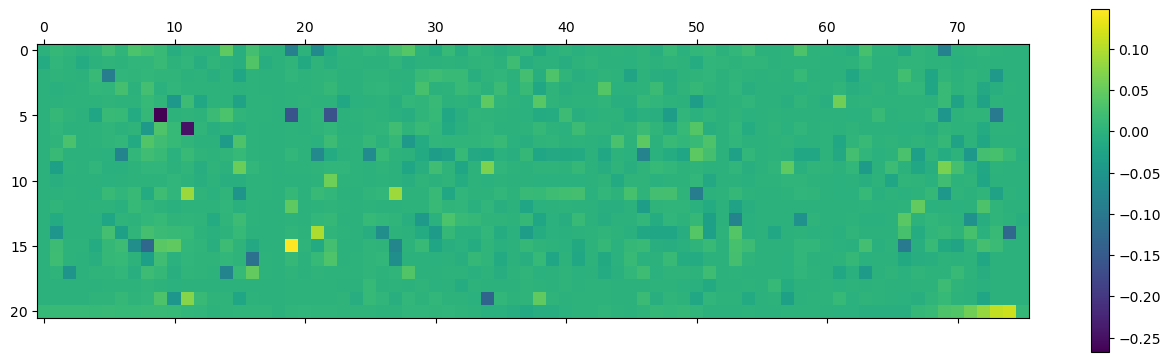

In [276]:
matshow(tt[19,:,:]')
colorbar()
savefig("../../T19_act.png")

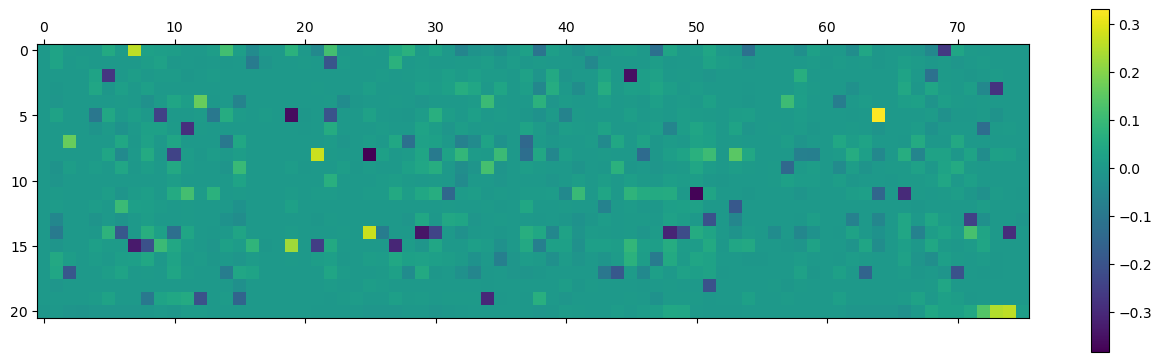

In [278]:
matshow(ttcond[19,3,:,:]')
colorbar()
savefig("../../Tcond19_3act.png")

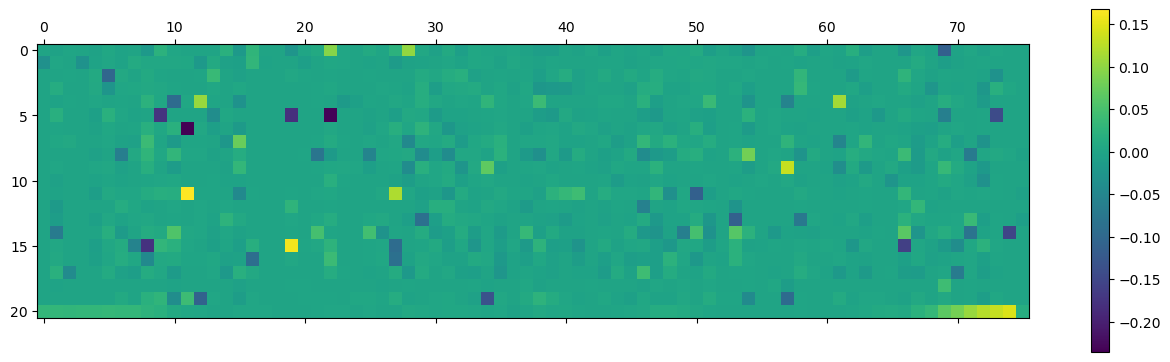

In [279]:
matshow(ttcond[19,4,:,:]')
colorbar()
savefig("../../Tcond19_4act.png")

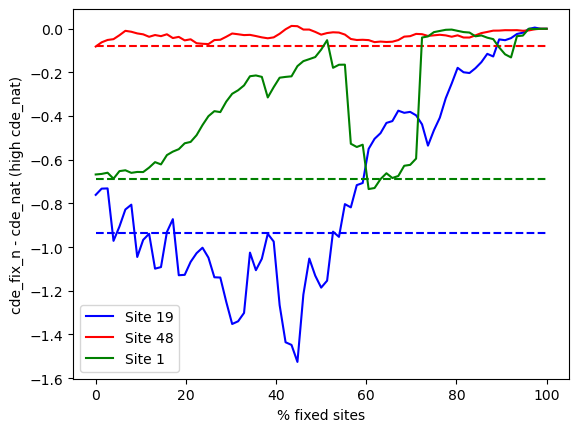

In [42]:
sites = [19,48,1]
c = ["blue", "red", "green"]
cde_incr = zeros(76, 77)
idx = 1
for site in sites
    seq_nat = argmax(cde_nat[:,site])
    #real_contr = [tt[site, i, mask_seq[i]] for i in 1:size(tt,2)]
    contr = [maximum(abs.(tt[site,i,:])) for i in 1:size(tt,2)]
    #mask_seq = Int8.([argmax(abs.(tt[site,i,:])) for i in 1:size(tt,2)])
    mask_sites = [i for i in 1:76];
    ord = sortperm(contr, rev = true)
    cde_incr[site,1] = cde_field(site, h,J)[1]  - cde_nat[seq_nat, site]  
    cde_incr[site,2:end] = ([cde_masked(site, mask_sites[ord][1:i], nat_dbd[seq_nat,:][mask_sites[ord][1:i]], h, J)[1] 
            for i in 1:76] .- cde_nat[seq_nat, site]);
    plt.plot([i for i in 0:76] .* 100 ./ 76, cde_incr[site,:], label = "Site $(site)", color = c[idx])
    plt.plot([0,100], [entr_nat[site] .- cde_nat[argmax(cde_nat[:,site]),site] for _ in 1:2],linestyle = "--", color = c[idx])
    idx += 1 
end

plt.xlabel("% fixed sites")
plt.ylabel("cde_fix_n - cde_nat (high cde_nat)") 
plt.legend()
savefig("../fig_cde_3sites_high.png")

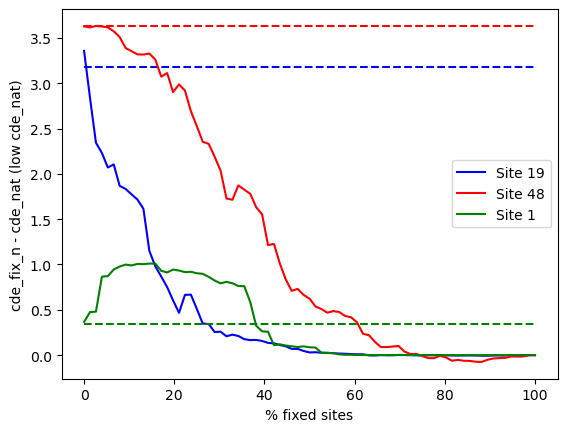

In [43]:
sites = [19, 48,1]
c = ["blue", "red", "green"]
cde_incr = zeros(76, 77)
idx = 1
for site in sites
    seq_nat = argmin(cde_nat[:,site])
    contr = [maximum(abs.(tt[site,i,:])) for i in 1:size(tt,2)]
    mask_sites = [i for i in 1:76];
    ord = sortperm(contr, rev = true)
    cde_incr[site,1] = cde_field(site, h,J)[1]  - cde_nat[seq_nat, site]  
    cde_incr[site,2:end] = ([cde_masked(site, mask_sites[ord][1:i], nat_dbd[seq_nat,:][mask_sites[ord][1:i]], h, J)[1] 
            for i in 1:76] .- cde_nat[seq_nat, site]);
    plt.plot([i for i in 0:76] .* 100 ./ 76, cde_incr[site,:], label = "Site $(site)", color = c[idx])
    plt.plot([0,100], [entr_nat[site] .- cde_nat[argmin(cde_nat[:,site]),site] for _ in 1:2],linestyle = "--", color = c[idx])
    idx += 1
end


plt.xlabel("% fixed sites")
plt.ylabel("cde_fix_n - cde_nat (low cde_nat)") 
plt.legend()
savefig("../fig_cde_3sites_low.png")

In [313]:

n_seq = size(nat_dbd,1)
cde_incr = zeros(76,76,n_seq)
#given a site, and a portion of the background, returns what is cde[site|masked_back] - cde[site|all_back]
#also returns which nat_seqs are used and their cde_back

chosen_seqs = zeros(Int, n_seq, 76)
chosen_cdes = zeros(n_seq, 76)

sites = [18,19]

for site in sites
    idx = 0
    contr = [maximum(abs.(tt[site,i,:])) for i in 1:size(tt,2)]
    ord = sortperm(contr, rev = true) #order according to saverio T
    #ord = links[site,:]
    #ord = sortperm(FN[1,:], rev = true) #order according to frobhenius norm
    #seqs = sortperm(cde_nat[:,site], rev = false)[1:n_seq] #most conserved seqs
    #seqs = sortperm(cde_nat[:,site], rev = true)[1:n_seq] #most variable seqs
    #seqs = Int.(rand(1:size(nat_dbd, 1), n_seq))  #seqs extracted at random
    for s in 1:n_seq
        idx += 1
        cde_incr[site, :,idx] = ([cde_masked(site, ord[1:i], nat_dbd[s,:][ord[1:i]], h, J)[1] 
            for i in 1:76] .- cde_nat[s, site]);
    end
    chosen_seqs[:, site] = seqs
    chosen_cdes[:, site] = cde_nat[seqs, site]
end

t = 0.3
perc_seqs = zeros(76,76) 

#for every site gives how many natural seqs converge to cde
for site in sites
    perc_seqs[site,:] = [sum([all(x -> x < t, abs.(cde_incr[site, pos:end,i])) 
            for i in 1:size(cde_incr, 3)]) * 100/size(cde_incr, 3) for pos in 1:76]    
end

t = 0.3
abund = zeros(76, n_seq)  
#given a site, returns how much of the back fixes cde[site] for each background seq, do a hist
L = size(abund,1)
for site in sites
    for s in 1:n_seq
        for pos in 1:L
            p = all(x -> x < t, abs.(cde_incr[site, pos:end,s]))
            if p == true
                abund[site, s] = pos * 100/L 
                break
            end
        end
    end                 
end

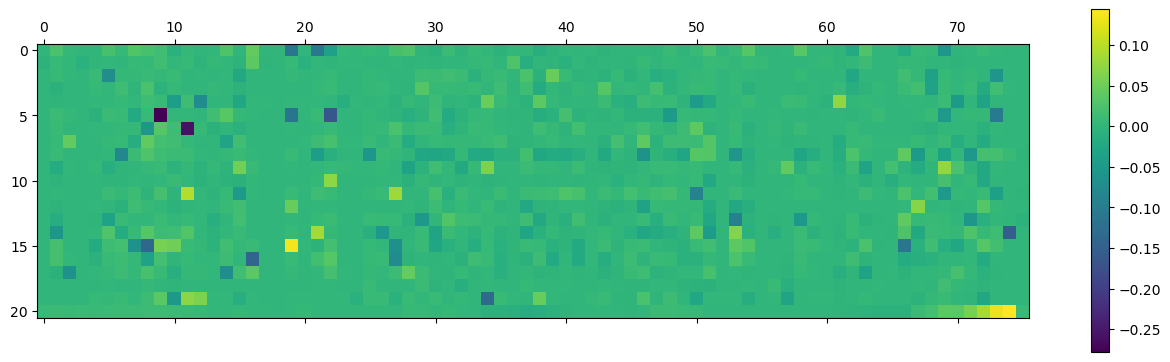

In [212]:
matshow(tt[19,:,:]')
colorbar()
savefig("../../dec_site19T.png")

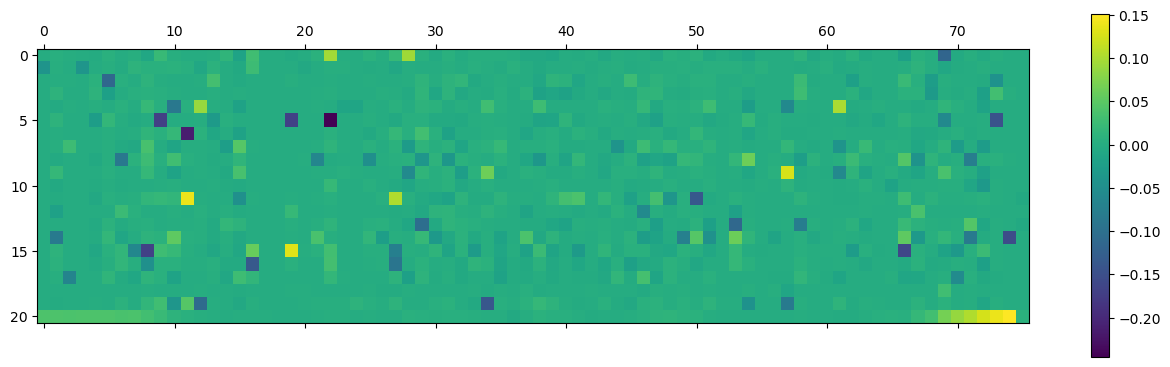

In [217]:
matshow(ttcond[19, 4,:,:]')
colorbar()
savefig("../../dec_site19T4.png")

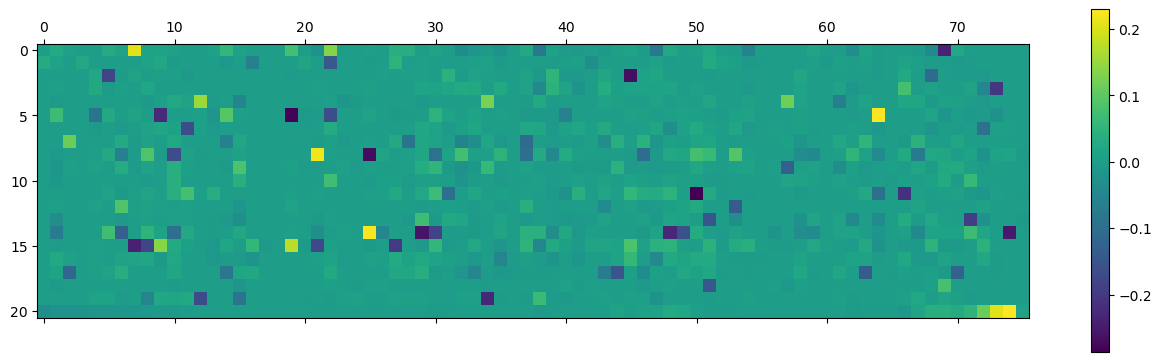

In [216]:
matshow(ttcond[19, 3,:,:]')
colorbar()
savefig("../../dec_site19T3.png")

 33.048004 seconds (20.91 M allocations: 2.926 GiB, 1.20% gc time)


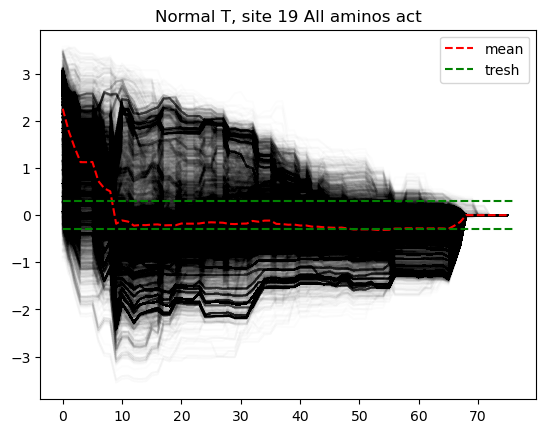

In [280]:
site = 19
title = "Normal T, site $(site) All aminos act"
filename = "../NormalTsite$(site)allaminos_act.png"
@time res = CDE_masked_back(site, tt[site,:,:], nat_dbd, cde_nat, title, filename);

  3.007057 seconds (1.89 M allocations: 264.800 MiB, 1.33% gc time)


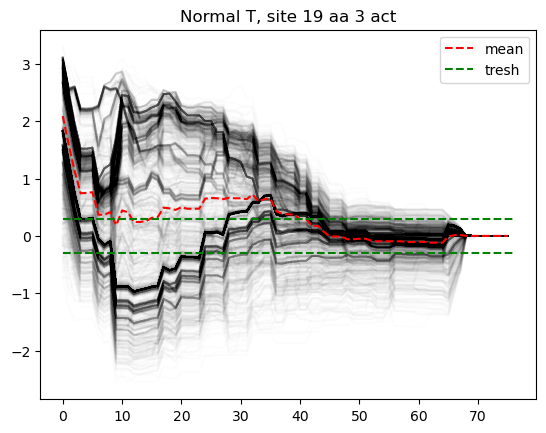

In [281]:
aa = 3
site = 19
idxs = nat_dbd[:,site] .== aa
nat_red = nat_dbd[idxs, :]
cde_red = cde_nat[idxs,:]
title = "Normal T, site $(site) aa $(aa) act"
filename = "../NormalTsite$(site)aa$(aa)act.png"
@time res = CDE_masked_back(site, tt[site,:,:], nat_red, cde_red, title, filename);

 23.345809 seconds (14.23 M allocations: 1.993 GiB, 1.10% gc time)


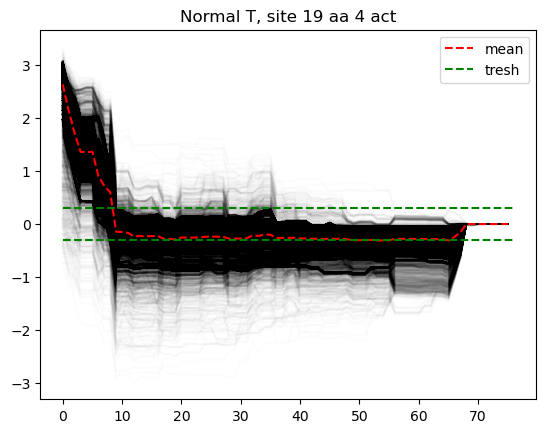

In [282]:
aa = 4
site = 19
idxs = nat_dbd[:,site] .== aa
nat_red = nat_dbd[idxs, :]
cde_red = cde_nat[idxs,:]

title = "Normal T, site $(site) aa $(aa) act"
filename = "../NormalTsite$(site)aa$(aa)act.png"
@time res = CDE_masked_back(site, tt[site,:,:], nat_red, cde_red, title, filename);

  3.948107 seconds (1.89 M allocations: 264.854 MiB, 1.01% gc time)


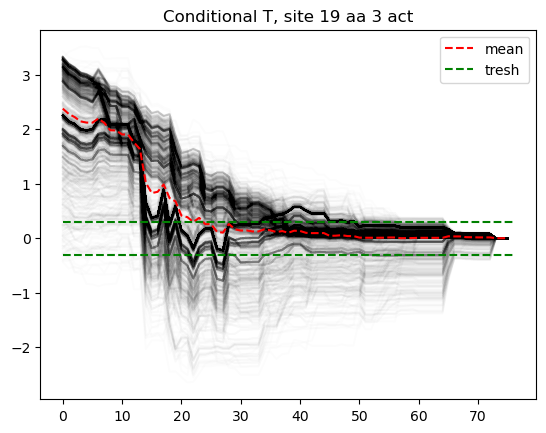

In [283]:
aa = 3
site = 19
idxs = nat_dbd[:,site] .== aa
nat_red = nat_dbd[idxs, :]
cde_red = cde_nat[idxs,:]

title = "Conditional T, site $(site) aa $(aa) act"
filename = "../ConditionalTsite$(site)aa$(aa)act.png"
@time res = CDE_masked_back(site, ttcond[site, aa, :, :], nat_red, cde_red, title, filename);

 23.130942 seconds (14.23 M allocations: 1.993 GiB, 1.12% gc time)


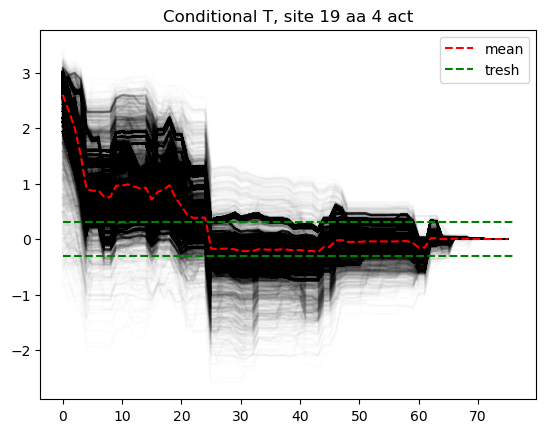

In [284]:
aa = 4
site = 19
idxs = nat_dbd[:,site] .== aa
nat_red = nat_dbd[idxs, :]
cde_red = cde_nat[idxs,:]
title = "Conditional T, site $(site) aa $(aa) act"
filename = "../ConditionalTsite$(site)aa$(aa)act.png"
@time res = CDE_masked_back(site, ttcond[site, aa, :, :], nat_red, cde_red, title, filename);

In [285]:
folder_path = "../../scra_data_beta/sparse_amino_mixed_dbd_steps50000_seqs500_T1.0p0.5/"
fasta_files = filter(file -> endswith(file, ".mixedDNA"), readdir(folder_path))
@time matrices = [Int8.(fasta2matrix(joinpath(folder_path, file))) 
    for file in fasta_files]
step_matrices = build_seq_matrices(matrices)
;

  9.612810 seconds (1.64 M allocations: 208.302 MiB, 0.79% gc time, 0.57% compilation time)


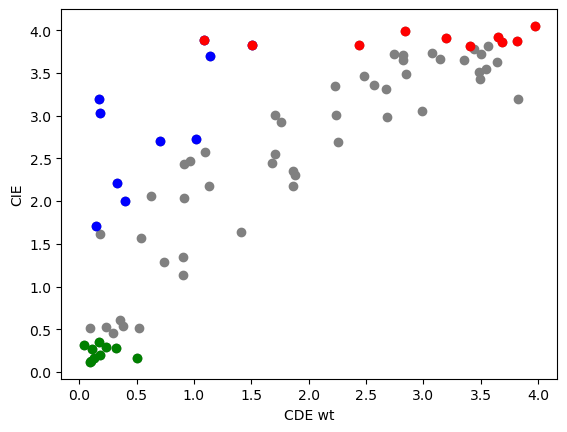

In [286]:
ep = sortperm(entr_nat .- cde_wt, rev = true)[1:10]
vari = sortperm(entr_nat, rev = true)[1:10]
cons = sortperm(entr_nat, rev = false)[1:10]
scatter(cde_wt, entr_nat, color = "grey")
scatter(cde_wt[ep], entr_nat[ep], color = "blue")
scatter(cde_wt[vari], entr_nat[vari], color = "red")
scatter(cde_wt[cons], entr_nat[cons], color = "green")
xlabel("CDE wt")
ylabel("CIE")
savefig("../../act_cievscde_wt.png")

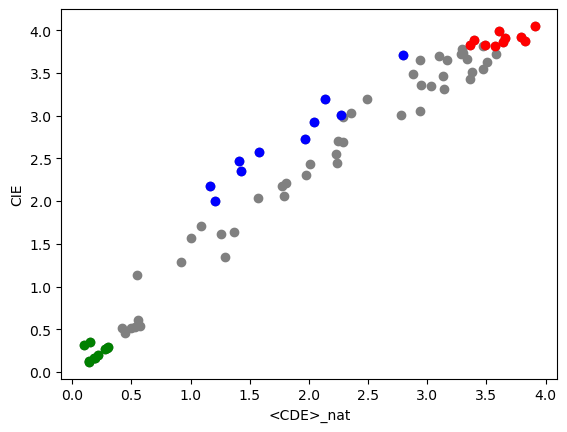

In [208]:
mep = sortperm(entr_nat .- m_cde_nat, rev = true)[1:10]
mvari = sortperm(entr_nat, rev = true)[1:10]
mcons = sortperm(entr_nat, rev = false)[1:10]
scatter(m_cde_nat, entr_nat, color = "grey")
scatter(m_cde_nat[mep], entr_nat[mep], color = "blue")
scatter(m_cde_nat[mvari], entr_nat[mvari], color = "red")
scatter(m_cde_nat[mcons], entr_nat[mcons], color = "green")
xlabel("<CDE>_nat")
ylabel("CIE")
savefig("../../dec_cievsmcde_nat.png")

In [104]:
@time freqs = [reshape(compute_weighted_frequencies(Int8.(step_matrices[i]'), 22, 0.)[1], (21,76)) for i in 1:500]
entr = [get_entropy(freqs[i]) for i in 1:500];
entr_rs = hcat(entr...);
steps = [1 + 100*(i-1) for i in 1:500];

θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500
θ = 0.0 threshold = 0.0
M = 500 N = 76 Meff = 500


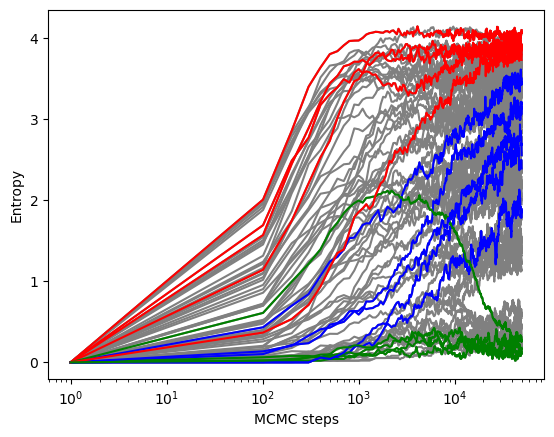

In [218]:
for i in 1:76
    plt.plot(steps, entr_rs[i, :], color = "grey")
    plt.xscale("log")
end

for i in 1:5
    plt.plot(steps, entr_rs[ep[i], :], color = "blue")
    plt.plot(steps, entr_rs[vari[i], :], color = "red")
    plt.plot(steps, entr_rs[cons[i], :], color = "green")
end

plt.xlabel("MCMC steps")
plt.ylabel("Entropy")
savefig("../../evol_dec.png")

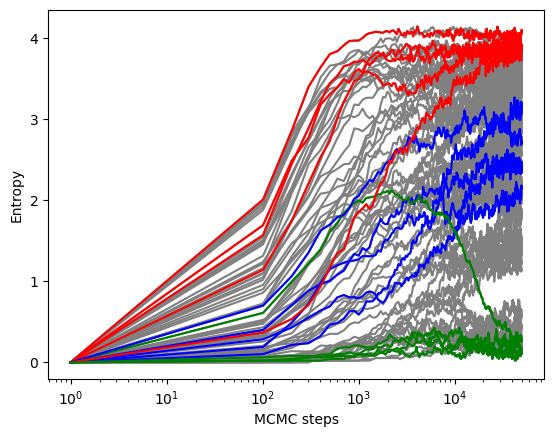

In [219]:
for i in 1:76
    plt.plot(steps, entr_rs[i, :], color = "grey")
    plt.xscale("log")
end

for i in 1:5
    plt.plot(steps, entr_rs[mep[i], :], color = "blue")
    plt.plot(steps, entr_rs[mvari[i], :], color = "red")
    plt.plot(steps, entr_rs[mcons[i], :], color = "green")
end

plt.xlabel("MCMC steps")
plt.ylabel("Entropy")
savefig("../../evol_dec_m.png")

In [155]:
cde_1chain = cde_chain(matrices[1][1:500,:], h, J);

In [193]:
pos = find_positions(matrices[1][1:501,:])
times = [1+100*(i-1) for i in 1:500];

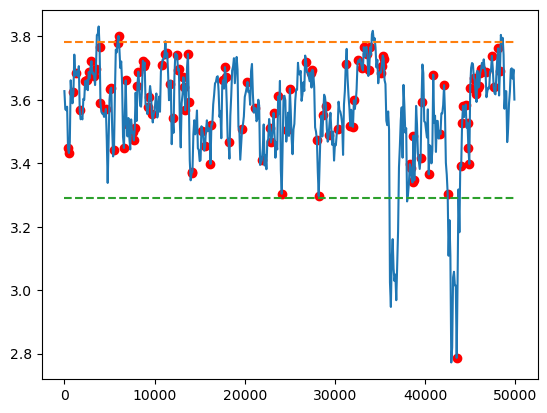

PyObject <matplotlib.collections.PathCollection object at 0x7f0c9574b220>

In [206]:
site = 2
plt.plot(steps, cde_1chain[:, site])
plt.plot([0, 50000], [entr_nat[site] for i in 1:2], linestyle = "--")
plt.plot([0, 50000], [m_cde_nat[site] for i in 1:2], linestyle = "--")
plt.scatter(times[pos .== site], cde_1chain[pos .== site, site], color = "red")

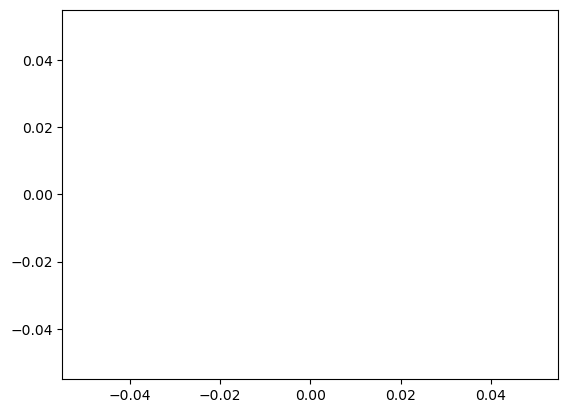

PyObject <matplotlib.collections.PathCollection object at 0x7f0cc97c8100>

In [188]:
plt.scatter(times[pos .== site], pos[pos .== site])

In [171]:
maximum(entr_nat - cde_wt)

2.845708202149511

In [175]:
sqrt(var_cde_nat[mep[1]])

0.8813492670442007

In [ ]:
## Saverio functions